# This jupyter notebook is prepared by Andrew Tuazon

#Load Data and perform general EDA 

##I. import libraries: pandas, numpy, matplotlib (set %matplotlib inline), matplotlib’s pyplot, seaborn, missingno, scipy’s stats, sklearn

In [382]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn.model_selection import train_test_split
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

## II. import the data to a dataframe and show the count of rows and columns

In [383]:
df = pd.read_csv('/content/drive/MyDrive/ecommarce.csv', index_col=0)
df.shape

(500, 8)

##III. Show the top 5 and last 5 rows

In [384]:
df.head()

,Email,Address,Credit Card,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,adkv@ota.com,"89280 Mark Lane\nNew John, MN 16131",3544288738428794,35.497268,13.655651,40.577668,4.582621,588.951054
1,gjun@syj.com,"363 Amanda Cliff Apt. 638\nWest Angela, KS 31437",6546228325389133,32.926272,12.109461,38.268959,3.164034,393.204933
2,qjyr@pkk.com,"62008 Adam Lodge\nLake Pamela, NY 30677",4406395951712628314,34.000915,12.330278,38.110597,4.604543,488.547505
3,jkiu@xsb.com,"950 Tami Island\nLake Aimeeview, MT 93614",30334036663133,35.305557,14.717514,37.721283,3.620179,582.852344
4,stvb@niy.com,"08254 Kelly Squares\nNorth Lauren, AR 78382",3582080469154498,34.330673,13.795189,38.536653,4.946308,600.406092


In [385]:
df.tail()

,Email,Address,Credit Card,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
495,xskz@gwj.com,"7083 Wallace Rest\nNew Trevor, NM 70240",30206742023085,34.237660,14.566160,37.417985,4.246573,574.847438
496,awrc@iok.com,"663 Christopher Garden\nLake Carrieberg, PA 70796",6011536844623717,35.702529,12.695736,38.190268,4.076526,530.049004
497,pndt@jyr.com,"1555 Chen Road\nBergerchester, NH 46418",4086276267550896697,33.646777,12.499409,39.332576,5.458264,552.620145
498,zvtz@onj.com,"5568 Robert Station Apt. 030\nTurnerstad, GA 9...",36218092488069,34.322501,13.391423,37.840086,2.836485,457.469510
499,phqb@nlg.com,"424 Mark Junctions\nDarrellchester, TX 09088",5427200269739116,34.715981,13.418808,36.771016,3.235160,498.778642


##IV. call the describe method of dataframe to see some summary statistics of the numerical columns

In [386]:
df.describe()

,Credit Card,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,5.000000e+02,500.000000,500.000000,500.000000,500.000000,500.000000
mean,3.706324e+17,34.053194,13.052488,38.060445,4.033462,500.314038
std,1.235588e+18,0.992563,0.994216,1.010489,0.999278,79.314782
min,5.018057e+11,30.532429,9.508152,34.913847,0.769901,257.670582
25%,3.683275e+13,33.341822,12.388153,37.349257,3.430450,446.038277
50%,3.513612e+15,34.082008,12.983231,38.069367,4.033975,499.887875
75%,4.777131e+15,34.711985,13.753850,38.716432,4.626502,550.313828
max,4.959148e+18,37.139662,16.126994,41.005182,7.422689,766.518462


###Explain in words about the description of any two variables

The yearly amount spent variable is our target variable, with a mean value of about 500 dollars. The min is around half that of the mean, and the max is at 766 dollars. The length of membership variable has a mean value of about 4 years, with the min being less than a year and the max being 7.4 years. There are no missing values between these two variables. The std of length of membership is about a year and the std of yearly amount spent is about 79 dollars.

##V.Show any missing value analysis

In [387]:
nulls = df.isnull().sum().to_frame('nulls') #sum up nulls and make a df
nulls.sort_values("nulls", inplace = True, ascending = False) #sort it by descending order
for index, row in nulls.iterrows(): #print it in well formatted way
  print(index, row[0])

Email 0
Address 0
Credit Card 0
Avg. Session Length 0
Time on App 0
Time on Website 0
Length of Membership 0
Yearly Amount Spent 0


##VI. Plot various scatter plots to understand the data

###Yearly amount Spent vs Time on Website

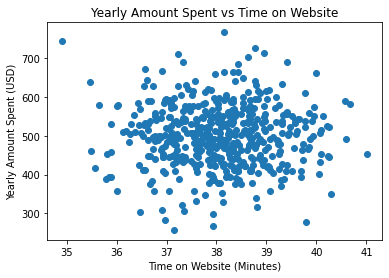

In [388]:
plt.scatter(df['Time on Website'],df['Yearly Amount Spent'],)
plt.title('Yearly Amount Spent vs Time on Website')
plt.ylabel('Yearly Amount Spent (USD)')
plt.xlabel('Time on Website (Minutes)')
plt.show()

###Yearly amount Spent vs Time on App

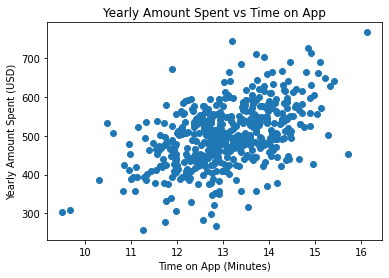

In [389]:
plt.scatter(df['Time on App'], df['Yearly Amount Spent'])
plt.title('Yearly Amount Spent vs Time on App')
plt.ylabel('Yearly Amount Spent (USD)')
plt.xlabel('Time on App (Minutes)')
plt.show()

###Length of membership vs Time on App

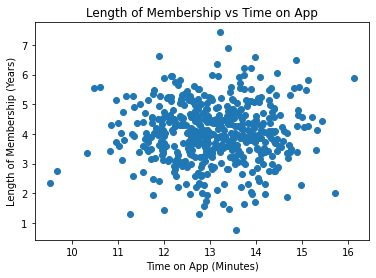

In [390]:
plt.scatter(df['Time on App'], df['Length of Membership'])
plt.title('Length of Membership vs Time on App')
plt.ylabel('Length of Membership (Years)')
plt.xlabel('Time on App (Minutes)')
plt.show()

###Generate sns pairplot. Based on the plots, what feature is mostly correlated with the yearly amount spent?

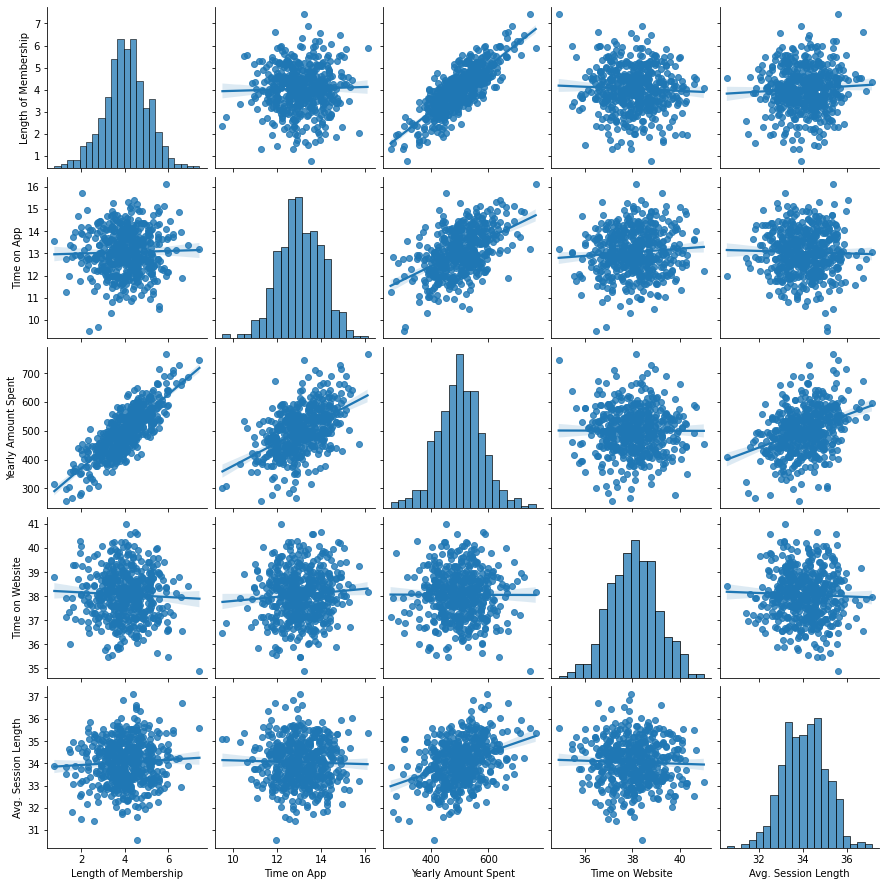

In [391]:
g = sns.pairplot(df, vars = ['Length of Membership', 'Time on App', 'Yearly Amount Spent', 'Time on Website', 'Avg. Session Length'], kind='reg')

#### Length of membership is mostly correlated with yearly amount spent


### Also, plot sns heatmap based on correlation with annot=True and discuss which columns must be removed based on that and which column is mostly interesting and related to Yearly Amount Spent?

Yearly Amount Spent     1.000000
Length of Membership    0.809084
Time on App             0.499328
Avg. Session Length     0.355088
Time on Website        -0.002641
Credit Card            -0.011589
Name: Yearly Amount Spent, dtype: float64
Index(['Yearly Amount Spent', 'Length of Membership', 'Time on App',
       'Avg. Session Length', 'Time on Website', 'Credit Card'],
      dtype='object')


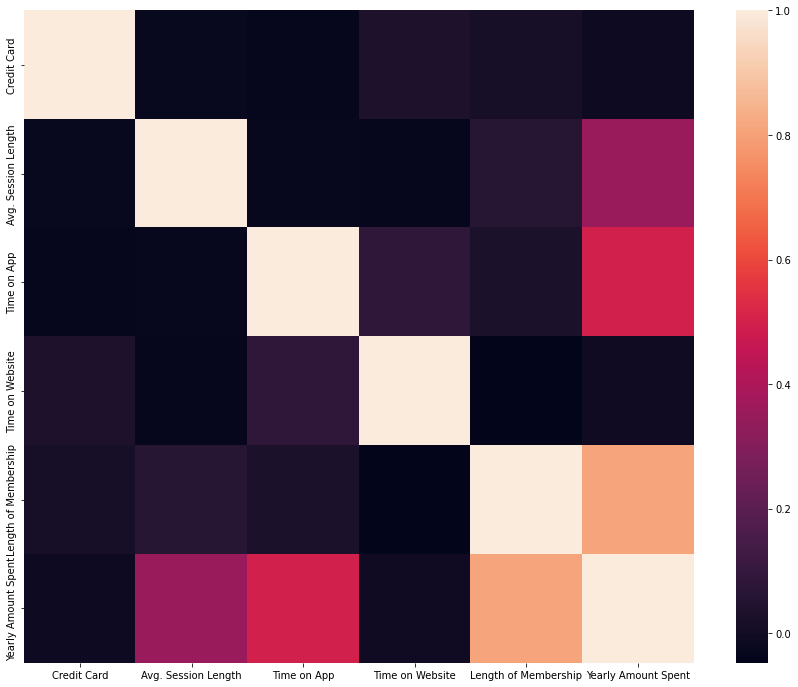

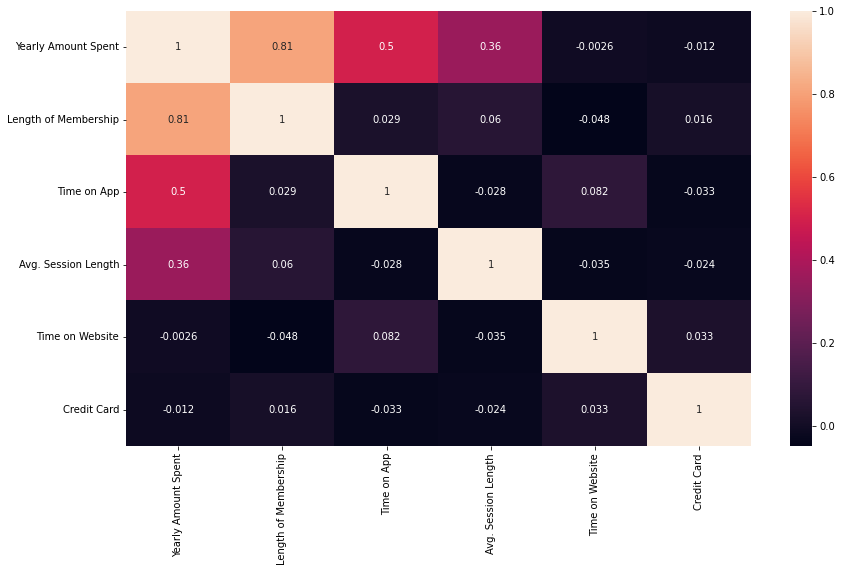

In [392]:
num_features = df.select_dtypes(include = [np.number])
num_features.columns
correlation = num_features.corr()
print(correlation['Yearly Amount Spent'].sort_values(ascending = False))

plt.figure(figsize = (15, 12))
sns.heatmap(correlation)

numColumns = 6
columns = correlation.nlargest(numColumns, 'Yearly Amount Spent')['Yearly Amount Spent'].index
print(columns)
c = np.corrcoef(df[columns].values.T)
plt.figure(figsize = (14, 8))
sns.heatmap(c, annot= True, xticklabels=columns.values, yticklabels = columns.values)

####Time on Website and Credit Card columns must be removed, as they are poorly correlated with the target which is Yearly Amount Spent. The other columns have acceptable correlation with the target. The most interesting column related to the target is the Length of Membership, as it has a very strong correlation with the target.

###Generate a scatter plot with the interesting column you found in the last step against the Yearly Amount Spent

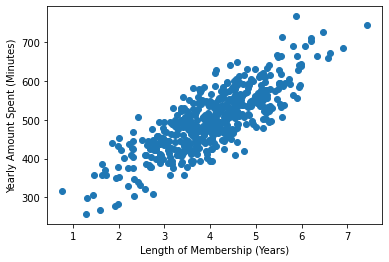

In [393]:
plt.scatter(df['Length of Membership'], df['Yearly Amount Spent'])
plt.xlabel('Length of Membership (Years)')
plt.ylabel('Yearly Amount Spent (Minutes)')
plt.show()

#Feature Selection and Pre-processing

##Based on the EDA and null analysis, drop the unnecessary columns for the regression

In [394]:
num_features = df.select_dtypes(include = [np.number])
num_features.columns
correlation = num_features.corr()
corr = correlation['Yearly Amount Spent'].to_frame()
corr[corr['Yearly Amount Spent'] <0.30 ].index
r = corr[(-0.3 < corr['Yearly Amount Spent']) & (corr['Yearly Amount Spent'] < 0.3)].index

new_df = df.drop(r, axis = 1)
new_df = new_df.drop(columns=['Email', 'Address'])
new_df.shape

new_df.head()

,Avg. Session Length,Time on App,Length of Membership,Yearly Amount Spent
0,35.497268,13.655651,4.582621,588.951054
1,32.926272,12.109461,3.164034,393.204933
2,34.000915,12.330278,4.604543,488.547505
3,35.305557,14.717514,3.620179,582.852344
4,34.330673,13.795189,4.946308,600.406092


#X/Y and Training/Test Split

##Use sklearn's train_test_split to split the data set into training and test sets. There should be 30% records in the test set. The random_state should be 101 

In [395]:
y = new_df['Yearly Amount Spent']
X = new_df.drop(columns='Yearly Amount Spent')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

X_train_scaler = StandardScaler().fit(X_train)
X_test_scaler = StandardScaler().fit(X_test)

X_train_scaled = X_train_scaler.transform(X_train)
X_test_scaled = X_test_scaler.transform(X_test)

# Training Linear Model using SKLearn's LinearRegression 

##Train a linear model using Sklearn's LinearRegression

In [396]:
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)

LinearRegression()

## After training, show the coefficients and intercept

In [397]:
print('Coefficients: {}'.format(reg_all.coef_))
print('Intercept: {}'.format(reg_all.intercept_))

Coefficients: [25.98759055 38.60941287 61.2690456 ]
Intercept: -1135.499478149062


##Predict for the test data

In [398]:
y_pred = reg_all.predict(X_test)

##Generate a scatter plot that shows the Y test on x-axis and y predicted in y-axis

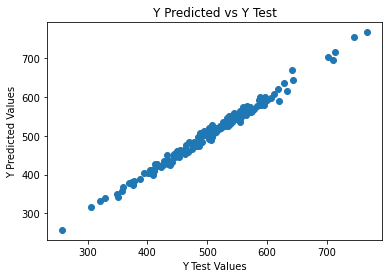

In [399]:
plt.scatter(y_test, y_pred)
plt.xlabel('Y Test Values')
plt.title('Y Predicted vs Y Test')
plt.ylabel('Y Predicted Values')
plt.show()

## Use sklearn's metrics to print the value of MAE, MSE, RMSE, and R^2

In [400]:
print('MAE: {}'.format(mean_absolute_error(y_test, y_pred)))
print('MSE: {}'.format(mean_squared_error(y_test, y_pred)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))
print('R^2: %.14f' % r2_score(y_test, y_pred))

MAE: 7.236949056091413
MSE: 80.19544609397695
Root Mean Squared Error: 8.955191013818576
R^2: 0.98895194443779


##Interpretation: Interpret the coefficient and which coefficient belongs to which feature and based on that explain any strategy that should help the business

### According to the order of the coefficients, Avg. Session Length feature has a coefficient of 25.98759055,	Time on App has coefficient of 38.60941287, and 	Length of Membership has a coefficient of 61.2690456. Due to these coefficients, we can see that we should prioritize the mobile experience, as well as lengthening the avg session time with customers and promoting benefits that will encourage people to retain their memberships for an extended period of time. All of these should contribute to a member spending more money per year.

#Normal Equation

##Implement Normal Equation and find best_theta values based on the training set

In [401]:
y = y_train.to_numpy().reshape(len(y_train),1)
n = len(X_train)
x_bias = np.ones((n,1))
x_new = np.append(x_bias, X_train.to_numpy(), axis=1)
theta_best_values=np.linalg.inv(x_new.T.dot(x_new)).dot(x_new.T).dot(y)

##Display the theta values. Are they very close to the sklearn's linear regression?

In [402]:
print(theta_best_values)

[[-1135.49947815]
 [   25.98759055]
 [   38.60941287]
 [   61.2690456 ]]


These values are identical to the ones found in Sklearn's linear regression

## Prepare the test set before prediction

In [403]:
n = len(X_test)
x_bias = np.ones((n,1))
x_newer = np.append(x_bias, X_test.to_numpy(), axis=1)

## Perform prediction for the test set

In [404]:
y_pred = x_newer.dot(theta_best_values)

## Generate a scatter plot that shows the Y test on x-axis and y predicted in y-axis

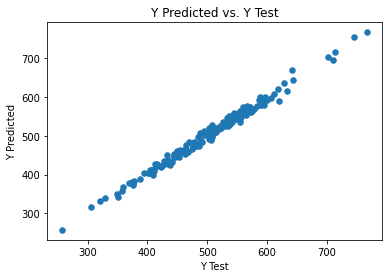

In [405]:
# Plot the output.
plt.scatter(y_test,y_pred,s=30,marker='o')
plt.plot()
plt.xlabel('Y Test')
plt.ylabel('Y Predicted')
plt.title('Y Predicted vs. Y Test')
plt.show()

## Use sklearn's metrics to print the value of MAE, MSE, RMSE, and R^2 

In [406]:
print('MAE: {}'.format(mean_absolute_error(y_test, y_pred)))
print('MSE: {}'.format(mean_squared_error(y_test, y_pred)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))
print('R^2: %.14f' % r2_score(y_test, y_pred))

MAE: 7.236949056100446
MSE: 80.19544609411986
Root Mean Squared Error: 8.955191013826553
R^2: 0.98895194443777


## What is the limitation of using the Normal equation for regression?

### The Normal Equation slows down for larger sizes of n, n being the size of the input.

#Batch Gradient Descent


##Implement Batch Gradient Descent based on the way we have learned in the class (See sample code form pdf). You can play with eta and n_iterations and should set to reasonable eta and number of iterations so that you can get the thetas close to Normal equation's theta

In [407]:
cost_list = []
epoch_list = []
predicted_list = []
n = len(X_train_scaled)
x_bias = np.ones((n,1))
x_batch_scaled = np.append(x_bias, X_train_scaled, axis=1)

m = len(X_train_scaled)
eta = 0.004
n_iterations = 900
theta = np.random.randn(4,1)
y = y_train.to_numpy().reshape(350, 1)

for iteration in range(n_iterations):
    gradients = 2 / m * x_batch_scaled.T.dot(x_batch_scaled.dot(theta) - y)
    theta = theta - eta * gradients

    y_pred = np.dot(theta.T, x_batch_scaled.T)
    cost = np.mean(np.square(y-y_pred)) # MSE (Mean Squared Error)
        
    if iteration%10==0:
      cost_list.append(cost)
      epoch_list.append(iteration)

##Display the theta values. Are they very close to the sklearn's linear regression?

In [408]:
theta

array([[499.35921281],
       [ 26.02657419],
       [ 36.66545966],
       [ 60.15989606]])

The coefficients of the theta values are close to the sklearn's linear regression, however the y-intercept is very different.

##Also plot step number (in x-axis) against the cost(y axis)

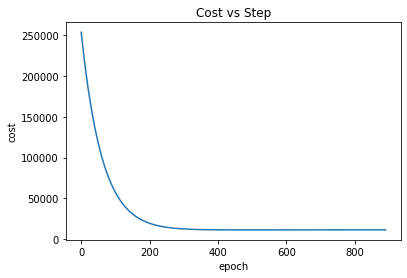

In [409]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.title("Cost vs Step")
plt.plot(epoch_list,cost_list)

##Perform Prediction for the test set

In [410]:
n = len(X_test_scaled)
x_bias = np.ones((n,1))
X_batch_test_scaled = np.append(x_bias, X_test_scaled, axis=1)
y_pred = np.dot(theta.T, X_batch_test_scaled.T)

##Generate a scatter plot that shows the Y test on the x-axis and y predicted in the y-axis

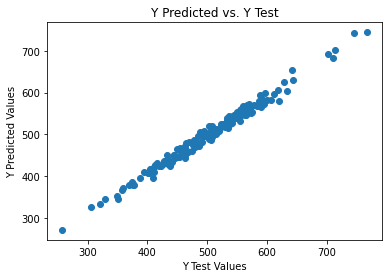

In [411]:
plt.scatter(y_test, y_pred)
plt.xlabel('Y Test Values')
plt.ylabel('Y Predicted Values')
plt.title('Y Predicted vs. Y Test')
plt.show()

##Use sklearn's metrics to print the value of MAE, MSE, RMSE, and R^2

In [412]:
y_pred = y_pred.reshape(150,1)
print('MAE: {}'.format(mean_absolute_error(y_test, y_pred)))
print('MSE: {}'.format(mean_squared_error(y_test, y_pred)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))
print('R^2: %.14f' % r2_score(y_test, y_pred))

MAE: 9.431277751898424
MSE: 135.69484996985025
Root Mean Squared Error: 11.648813242981031
R^2: 0.98130611755416


##Short Question: How do derivatives help in the process of gradient descent?

###Derivative helps us to see if we need to increase or decrease value of theta1, allowing us to get closer to the minimum.

##Short Question: What are the benefits and the limitations of using Stochastic gradient descent?


### Computes gradients at a single instance instead of using whole training set at every step. Algorithm much faster overall than Batch. Can use huge datasets. Less regular than Batch, however, the cost function will fluctuate. Final values end up not being optimal because they do not settle.

#SGDRegressor from sklearn

##Use sklearn's SGDRegressor to train a model for our data set. Put a reasonable iteration and tolerance and learning steps so that we can get coefficients close to normal equation

In [413]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.075)
sgd_reg.fit(X_train_scaled, y_train.ravel())

SGDRegressor(eta0=0.075, penalty=None)

##Display the theta values. Are they very close to sklearn's linear regression?


In [414]:
sgd_reg.intercept_, sgd_reg.coef_

(array([500.09291236]), array([25.93808338, 35.47622869, 59.48001041]))

These values are close to sklearn's linear regression in terms of coefficients, however the intercept is very different due to scaling of the training features.

##Predict for the test data

In [415]:
y_pred = sgd_reg.predict(X_test_scaled)

##Generate a scatter plot that shows the Y test on the x-axis and y predicted in the y-axis

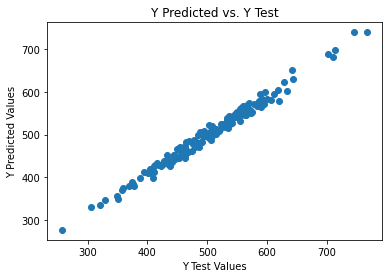

In [416]:
plt.scatter(y_test, y_pred)
plt.xlabel('Y Test Values')
plt.ylabel('Y Predicted Values')
plt.title('Y Predicted vs. Y Test')
plt.show()

##Use sklearn's metrics to print the value of MAE, MSE, RMSE, and R^2

In [417]:
print('MAE: {}'.format(mean_absolute_error(y_test, y_pred)))
print('MSE: {}'.format(mean_squared_error(y_test, y_pred)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))
print('R^2: %.14f' % r2_score(y_test, y_pred))

MAE: 10.151067082663493
MSE: 153.84279140993755
Root Mean Squared Error: 12.403337914043039
R^2: 0.97880598225801


#Mini-batch Gradient Descent 

##Briefly explain how mini-batch can overcome the limitations of Batch gradient descent and SGD.

###Mini-batch progresses much less erratically in parameter space than SGD, even with large mini-batches. It also ends up getting closer to the minimum than SGD, while BGD gets to the minimum. BGD takes a lot of time to take each step too, but min-batch can get closer to the minimum faster with a good learning schedule.

#Polynomial of degree 2 

##Use sklearn's Polynomial features to degree = 2 on our training and test set

In [418]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)

###Use linearRegression on the new polynomial features

In [419]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)
lin_reg.intercept_, lin_reg.coef_

(-2005.7383451866028,
 array([ 8.04728627e+01,  3.13988754e+01,  5.66427252e+01, -7.97871242e-01,
        -5.78188957e-02,  1.36869127e-01,  3.52025088e-01,  1.08532709e-02,
        -1.88398607e-02]))

##Predict for test set

In [420]:
y_pred = lin_reg.predict(X_test_poly)

##Generate a scatter plot that shows the Y test on the x-axis and y predicted in the y-axis

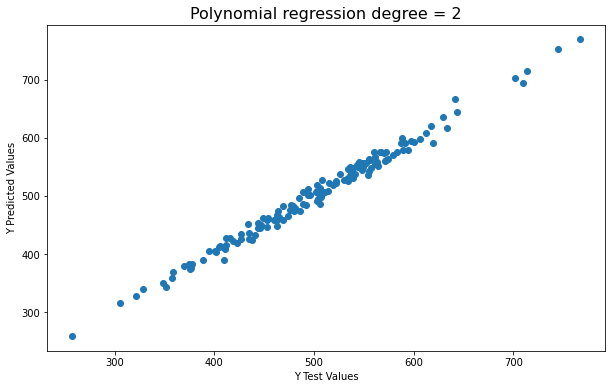

In [421]:
plt.figure(figsize=(10, 6))
plt.title("Polynomial regression degree = 2", size=16)
plt.scatter(y_test, y_pred)
plt.xlabel('Y Test Values')
plt.ylabel('Y Predicted Values')
plt.show()

##Use sklearn's metrics to print the value of MAE, MSE, RMSE, and R^2

In [422]:
print('MAE: {}'.format(mean_absolute_error(y_test, y_pred)))
print('MSE: {}'.format(mean_squared_error(y_test, y_pred)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))
print('R^2: %.14f' % r2_score(y_test, y_pred))

MAE: 7.378903230048621
MSE: 83.56961053943114
Root Mean Squared Error: 9.141641566996112
R^2: 0.98848710562106


#Polynomial of degree 3 

##Use sklearn's Polynomial features to degree = 3 on our training and test set



In [423]:
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)

##Use linearRegression on the new polynomial features

In [424]:
lin_reg.fit(X_train_poly, y_train)
lin_reg.intercept_, lin_reg.coef_

(-3287.2038833996535,
 array([ 2.39477941e+02, -1.88971807e+02,  3.63731680e+02, -7.26237245e+00,
         1.52226624e+01, -1.80657106e+01, -1.81783806e+00, -5.32452674e+00,
         9.17265707e+00,  9.00334855e-02, -3.03423493e-01,  2.82500806e-01,
         1.76045174e-01,  2.23741978e-01, -4.75280604e-01, -8.07411577e-02,
        -1.97671297e-01,  3.17252278e-01,  2.33102650e-01]))

##Predict for test set

In [425]:
y_pred = lin_reg.predict(X_test_poly)

##Generate a scatter plot that shows the Y test on the x-axis and y predicted in the y-axis

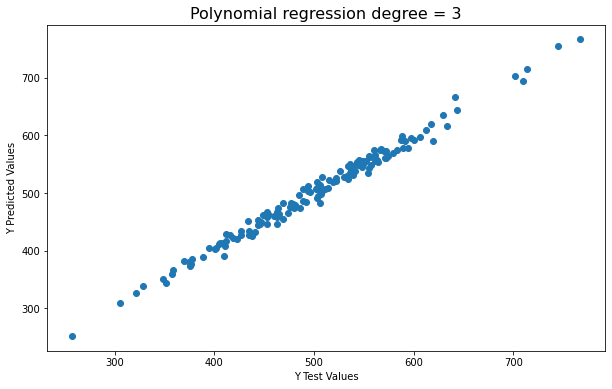

In [426]:
plt.figure(figsize=(10, 6))
plt.title("Polynomial regression degree = 3", size=16)
plt.scatter(y_test, y_pred)
plt.xlabel('Y Test Values')
plt.ylabel('Y Predicted Values')
plt.show()

##Use sklearn's metrics to print the value of MAE, MSE, RMSE, and R^2

In [427]:
print('MAE: {}'.format(mean_absolute_error(y_test, y_pred)))
print('MSE: {}'.format(mean_squared_error(y_test, y_pred)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))
print('R^2: %.14f' % r2_score(y_test, y_pred))

MAE: 7.442835122057757
MSE: 85.73001088458962
Root Mean Squared Error: 9.259050215037696
R^2: 0.98818947995511


#Learning Curve

##Generate learning curve with linearRegression

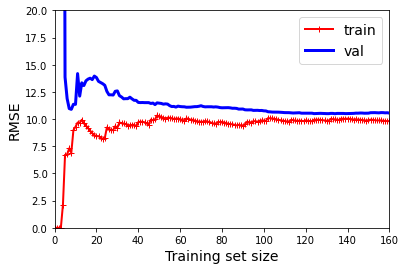

In [457]:
def plot_learning_curves(model, X, y):
    X_train_lc, X_val_lc, y_train_lc, y_val_lc = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train_lc) + 1):
        model.fit(X_train_lc[:m], y_train_lc[:m])
        y_train_predict = model.predict(X_train_lc[:m])
        y_val_predict = model.predict(X_val_lc)
        train_errors.append(mean_squared_error(y_train_lc[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val_lc, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)              


y = new_df['Yearly Amount Spent']
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X_train, y_train)
plt.axis([0, 160, 0, 20])                         
plt.show()                                      


##Generate learning curve with polynomial regression with degree  = 5

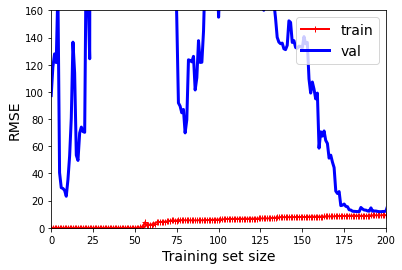

In [458]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=5, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X_train, y_train)
plt.axis([0, 200, 0, 160])           
plt.show()                        

##Interpret the result

###For the LinearRegression learning curve, we can see that there is some gap between the curves before convergence, so the model is performing better on the training data than the validation data in some instances. This may be indicative of high variance. In addition, the error is quite high for both curves, so the model may be underfitted. For the polynomial learning curve, there is a large gap between the curves, showing that there is some overfitting the moodel.

#Regularization

##Explain the purpose of regularization. For the following Regularization methods (number 14, 15 16, 17), use the polynomial degree 3 data set

###Regularization is used to reduce the risk of overfitting the model by reducing the degrees of freedom it has.

#Ridge Regression

##Use sklearn's Ridge to train the data set (use the polynomial degree 3 data set)

In [430]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky") #Cholesky uses a variant of the close form
ridge_reg.fit(X_train_poly, y_train)

Ridge(alpha=1, solver='cholesky')

## Predict for test set

In [431]:
y_pred = ridge_reg.predict(X_test_poly)

##Generate a scatter plot that shows the Y test on the x-axis and y predicted in the y-axis

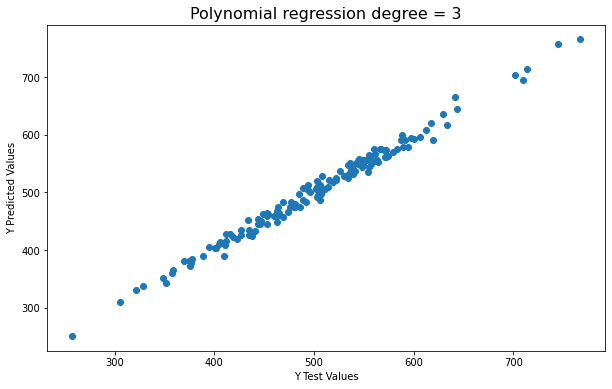

In [432]:
plt.figure(figsize=(10, 6))
plt.title("Polynomial regression degree = 3", size=16)
plt.scatter(y_test, y_pred)
plt.xlabel('Y Test Values')
plt.ylabel('Y Predicted Values')
plt.show()

##Use sklearn's metrics to print the value of MAE, MSE, RMSE, and R^2

In [433]:
print('MAE: {}'.format(mean_absolute_error(y_test, y_pred)))
print('MSE: {}'.format(mean_squared_error(y_test, y_pred)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))
print('R^2: %.14f' % r2_score(y_test, y_pred))

MAE: 7.443710578155056
MSE: 84.45564388601306
Root Mean Squared Error: 9.189975184189185
R^2: 0.98836504201122


#SGDRegressor for Ridge

##Use sklearn's SGDRegressor for Ridge Regression

In [434]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X_train_scaled, y_train.ravel())

SGDRegressor(random_state=42)

##Predict for test set

In [435]:
y_pred = sgd_reg.predict(X_test_scaled)

##Generate a scatter plot that shows the Y test on the x-axis and y predicted in the y-axis

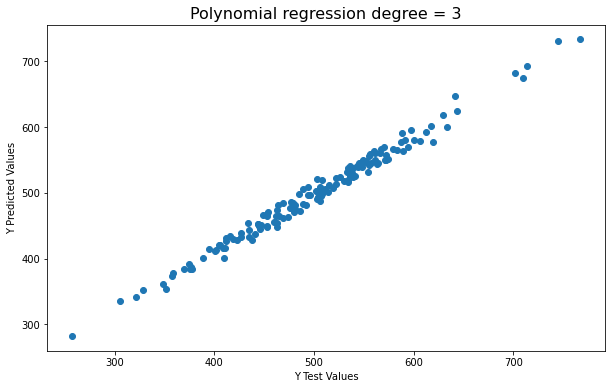

In [449]:
plt.figure(figsize=(10, 6))
plt.title("Polynomial regression degree = 3", size=16)
plt.scatter(y_test, y_pred)
plt.xlabel('Y Test Values')
plt.ylabel('Y Predicted Values')
plt.show()

##Use sklearn's metrics to print the value of MAE, MSE, RMSE, and R^2 

In [437]:
print('MAE: {}'.format(mean_absolute_error(y_test, y_pred)))
print('MSE: {}'.format(mean_squared_error(y_test, y_pred)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))
print('R^2: %.14f' % r2_score(y_test, y_pred))

MAE: 9.364175891099608
MSE: 133.1756036658293
Root Mean Squared Error: 11.540173467752957
R^2: 0.98165317932010


#Lasso Regression

##Use sklearn's Lasso

In [438]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train_scaled, y_train)

Lasso(alpha=0.1)

##Predict for test set

In [439]:
y_pred = lasso_reg.predict(X_test_scaled)

##Generate a scatter plot that shows the Y test on the x-axis and y predicted in the y-axis

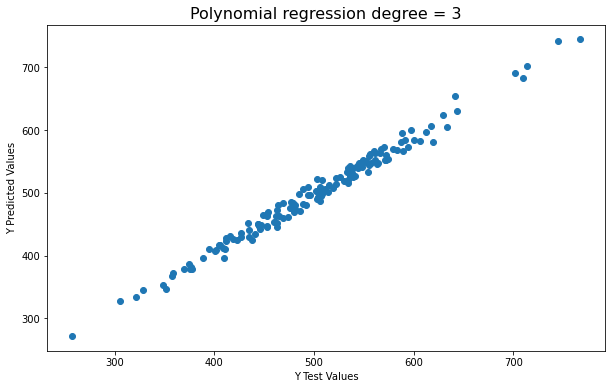

In [440]:
plt.figure(figsize=(10, 6))
plt.title("Polynomial regression degree = 3", size=16)
plt.scatter(y_test, y_pred)
plt.xlabel('Y Test Values')
plt.ylabel('Y Predicted Values')
plt.show()

##Use sklearn's metrics to print the value of MAE, MSE, RMSE, and R^2

In [441]:
print('MAE: {}'.format(mean_absolute_error(y_test, y_pred)))
print('MSE: {}'.format(mean_squared_error(y_test, y_pred)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))
print('R^2: %.14f' % r2_score(y_test, y_pred))

MAE: 9.44516933685725
MSE: 135.3465469731222
Root Mean Squared Error: 11.63385348769367
R^2: 0.98135410121218


##How Lasso perform the regularization and how does that affect the thetas?

### Lasso adds a regularization term to the cost function and uses the L1 norm of the weight vector. This causes less important features to be eliminated, so some of the coefficients become zero.

#Elastic Net 

##Use sklearn's ElasticNet

In [442]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_train_scaled, y_train)

ElasticNet(alpha=0.1)

##Predict for test set

In [443]:
y_pred = elastic_net.predict(X_test_scaled)

##Generate a scatter plot that shows the Y test in x axis and y predicted in y axis

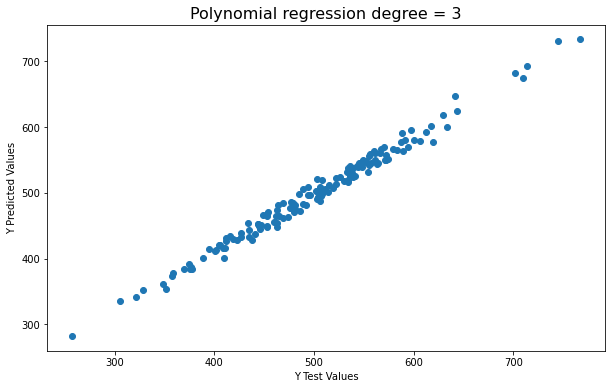

In [444]:
plt.figure(figsize=(10, 6))
plt.title("Polynomial regression degree = 3", size=16)
plt.scatter(y_test, y_pred)
plt.xlabel('Y Test Values')
plt.ylabel('Y Predicted Values')
plt.show()


##Use sklearn's metrics to print the value of MAE, MSE, RMSE and R^2

In [445]:
print('MAE: {}'.format(mean_absolute_error(y_test, y_pred)))
print('MSE: {}'.format(mean_squared_error(y_test, y_pred)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))
print('R^2: %.14f' % r2_score(y_test, y_pred))

MAE: 11.020155931211336
MSE: 188.3954610649117
Root Mean Squared Error: 13.725722606293328
R^2: 0.97404586391260


##How ElasticNet different compared to Lasso and RIDGE perform the regularization and how does that affect the thetas?

ElasticNet has an r term which acts as a ratio that combines the L1 and L2 penalties. Depending on the ratio, ElasticNet will act closer to Lasso if r is closer to 1 or to Ridge Regression if r is closer to 0. This causes some coefficients to be set to zero if the ElasticNet acts more like Lasso regression as the less important features are dropped. The high collinearity coefficient is also spared from being set to zero.